### 0. Data

In [1]:
import pandas as pd

In [3]:
coupon = pd.read_excel("http://byungwan.com/class/Coupon_Sample.xlsx")
coupon.head()

,CID,Gender,Age,CClass,Discount,Visits,Email,SMS,MStatus,Purchases,Sales
0,1,0,41,2,0,1,0,1,1,1,0.92
1,2,0,41,1,0,0,0,0,0,0,0.00
2,3,0,30,2,0,3,0,0,0,1,1.54
3,4,0,28,2,0,2,0,0,0,2,0.88
4,5,1,24,2,1,5,0,0,0,2,0.53


### 1. Linear regression w/ non-linear terms

In [5]:
import statsmodels.formula.api as smf

In [6]:
reg1 = smf.ols(formula = "Sales ~ Purchases", data = coupon).fit()
# try to find relationship between sales, purchases / y = B X
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1094.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):          1.14e-127
Time:                        11:12:04   Log-Likelihood:                -374.54
No. Observations:                 499   AIC:                             753.1
Df Residuals:                     497   BIC:                             761.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019      0.030      0.063      0.9

In [14]:
reg2 = smf.ols(formula = "Sales ~ Gender + Age + Discount + Visits + Email + SMS + MStatus + Purchases", data = coupon).fit()
print(reg2.summary())
# -1 excludes the intercept -> if you think this is more reasonable, add -1

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     153.6
Date:                Tue, 14 Oct 2025   Prob (F-statistic):          2.70e-128
Time:                        11:20:00   Log-Likelihood:                -351.74
No. Observations:                 499   AIC:                             721.5
Df Residuals:                     490   BIC:                             759.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1200      0.097     -1.237      0.2

In [15]:
import numpy as np

In [18]:
reg3 = smf.ols(formula = "Sales ~ Gender + Age + np.power(Age, 2) + Discount + Visits + Email + SMS + MStatus + Purchases + np.power(Purchases, 2)", data = coupon).fit()
print(reg3.summary())
# as age increase, sales increase.. after certain point, it decreases

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     130.8
Date:                Tue, 14 Oct 2025   Prob (F-statistic):          3.73e-131
Time:                        11:25:56   Log-Likelihood:                -339.78
No. Observations:                 499   AIC:                             701.6
Df Residuals:                     488   BIC:                             747.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [19]:
# How to interpret this?
# Age, Age^2 -> p-value is not smaller, greater than 0.05 -> not statistic significance that there is linear relation between age, age^2
# Purchases, Purchases^2 -> p-value are smaller than 0.05, both are significant -> there is a non-linear relationship

Sales = a0 + a1 * purchases + a2 * purchases^2
a1 = 0.6687, a2 = -0.02
a2 -> minus means concave (?)

- depends on the range -> 이거 전에 했잖아. 꺾여져 내려오는 부분이 사실 안보이는 걸수 있다 이런거

In [20]:
coupon["Purchases"].describe()

count    499.000000
mean       1.218437
std        1.399362
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max       12.000000
Name: Purchases, dtype: float64

In [21]:
x1 = np.array(range(0,13))
x1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [22]:
y1 = 0.6687 * x1 + (-0.02) * (x1**2)
# a1/a2 is what we got from regression, x1 is purchases

In [23]:
from matplotlib import pyplot as plt

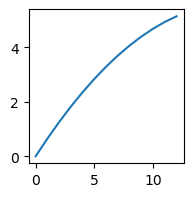

In [24]:
plt.figure(figsize=(2,2))
plt.plot(x1, y1)
plt.show()